# **Tugas Kaggle 1 Statistical Machine Learning**
## **Anggota Kelompok:**
1. Aldenka Rifqi Ganendra Murti/5003231015
2. Moh. Nafri Rehanata/5003231124
3. Rafli Maulana/5003231127
___

## **1. Import Modul**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

## **2. Load Data**

In [2]:
train = pd.read_csv("../Datasets/train.csv")
test = pd.read_csv("../Datasets/test.csv")
submission = pd.read_csv("../Datasets/sample_submission.csv")

In [3]:
print("Ukuran Train:", train.shape)
display(train.head())
print("Ukuran Test :", test.shape) 
display(test.head())

Ukuran Train: (1176, 36)


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,VM684,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,80,3,29,2,3,3,2,1,2,0
1,ZO618,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,80,1,3,2,3,2,1,2,1,0
2,JO233,46,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,80,1,23,3,3,12,9,4,9,0
3,GW565,25,Travel_Rarely,622,Sales,13,1,Medical,1,645,...,80,0,7,1,3,7,4,0,6,0
4,OZ187,43,Travel_Frequently,1001,Research & Development,9,5,Medical,1,663,...,80,1,10,3,3,8,7,4,7,0


Ukuran Test : (294, 35)


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,CM617,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,...,3,80,1,1,2,3,1,0,0,0
1,PJ010,44,Travel_Rarely,1117,Research & Development,2,1,Life Sciences,1,1246,...,4,80,1,10,5,3,10,5,7,7
2,GJ831,31,Travel_Rarely,688,Sales,7,3,Life Sciences,1,613,...,3,80,1,10,3,2,5,4,0,1
3,JD352,44,Travel_Rarely,1199,Research & Development,4,2,Life Sciences,1,1288,...,4,80,2,26,4,2,25,9,14,13
4,WZ263,36,Travel_Rarely,318,Research & Development,9,3,Medical,1,90,...,1,80,1,2,0,2,1,0,0,0


## **3. EDA(Exploratory Data Analysis)**

**Cek Data**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1176 non-null   object
 1   Age                       1176 non-null   int64 
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLevel                

In [5]:
multi_mapping = {
    "Education": {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"},
    "EnvironmentSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobInvolvement": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "PerformanceRating": {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"},
    "RelationshipSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "WorkLifeBalance": {1: "Bad", 2: "Good", 3: "Better", 4: "Best"}
}
train.replace(multi_mapping, inplace=True)
test.replace(multi_mapping, inplace=True)
train[["JobLevel", "StockOptionLevel"]] = train[["JobLevel", "StockOptionLevel"]].astype("object")
test[["JobLevel", "StockOptionLevel"]] = test[["JobLevel", "StockOptionLevel"]].astype("object")

In [6]:
print(f"Jumlah id duplikat di train: {train['id'].duplicated().sum()}")
print(f"Jumlah id duplikat di test : {test['id'].duplicated().sum()}")

Jumlah id duplikat di train: 3
Jumlah id duplikat di test : 0


In [7]:
# Tampilkan semua baris di train yang memiliki id duplikat (tampilkan semua kemunculan)
dup_ids = train[train.duplicated('id', keep=False)].sort_values('id')
print(f"Jumlah baris dengan id duplikat: {dup_ids.shape[0]}\n")
print("Daftar id yang duplikat beserta jumlahnya:")
print(train['id'].value_counts()[lambda x: x > 1])
dup_ids

Jumlah baris dengan id duplikat: 6

Daftar id yang duplikat beserta jumlahnya:
id
TP136    2
BN287    2
WA862    2
Name: count, dtype: int64


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
212,BN287,33,Travel_Frequently,970,Sales,7,Bachelor,Life Sciences,1,1114,...,80,1,4,3,Better,3,2,0,2,0
472,BN287,37,Non-Travel,1063,Research & Development,25,Doctor,Medical,1,529,...,80,2,15,2,Better,13,11,10,7,0
57,TP136,42,Travel_Rarely,462,Sales,14,College,Medical,1,936,...,80,0,10,6,Better,5,4,0,3,0
677,TP136,40,Travel_Rarely,676,Research & Development,9,Master,Life Sciences,1,1534,...,80,0,15,3,Bad,5,4,1,0,1
569,WA862,34,Travel_Frequently,135,Research & Development,19,Bachelor,Medical,1,1285,...,80,2,15,2,Best,11,8,5,10,0
1072,WA862,52,Travel_Rarely,1030,Sales,5,Bachelor,Life Sciences,1,1319,...,80,0,10,2,Good,8,7,7,7,1


In [8]:
train = train.drop_duplicates(subset="id", keep="first")

In [9]:
def cols_to_drop(data):
    return [col for col in data.columns if data[col].nunique() == 1 or data[col].nunique() == data.shape[0]]
print(f"Kolom Identik dan Unik Data Train: {cols_to_drop(train)}")
print(f"Kolom Identik dan Unik Data Test : {cols_to_drop(test)}")

Kolom Identik dan Unik Data Train: ['id', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
Kolom Identik dan Unik Data Test : ['id', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']


In [10]:
col_to_drop = ["id", "EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]
train = train.drop(columns=col_to_drop)
test = test.drop(columns=col_to_drop)

### **3.1 Statistika Deskriptif**

In [11]:
display(train.describe(include='number').T)
display(train.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
Age,1173.0,36.982950,9.178996,18.0,30.0,36.0,43.0,60.0
DailyRate,1173.0,803.687127,401.709774,103.0,467.0,798.0,1157.0,1499.0
DistanceFromHome,1173.0,9.348679,8.176508,1.0,2.0,7.0,14.0,29.0
HourlyRate,1173.0,65.478261,20.389649,30.0,48.0,66.0,83.0,100.0
MonthlyIncome,1173.0,6548.047741,4657.085276,1009.0,2950.0,5006.0,8412.0,19973.0
MonthlyRate,1173.0,14369.728048,7190.374236,2094.0,8045.0,14363.0,20715.0,26999.0
NumCompaniesWorked,1173.0,2.687127,2.482391,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1173.0,15.237852,3.681964,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,1173.0,11.359761,7.809823,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1173.0,2.761296,1.257457,0.0,2.0,3.0,3.0,6.0


,count,unique,top,freq
BusinessTravel,1173,3,Travel_Rarely,826
Department,1173,3,Research & Development,762
Education,1173,5,Bachelor,454
EducationField,1173,6,Life Sciences,477
EnvironmentSatisfaction,1173,4,High,376
Gender,1173,2,Male,702
JobInvolvement,1173,4,High,702
JobLevel,1173,5,2,435
JobRole,1173,9,Sales Executive,272
JobSatisfaction,1173,4,Very High,366


**Boxplot**

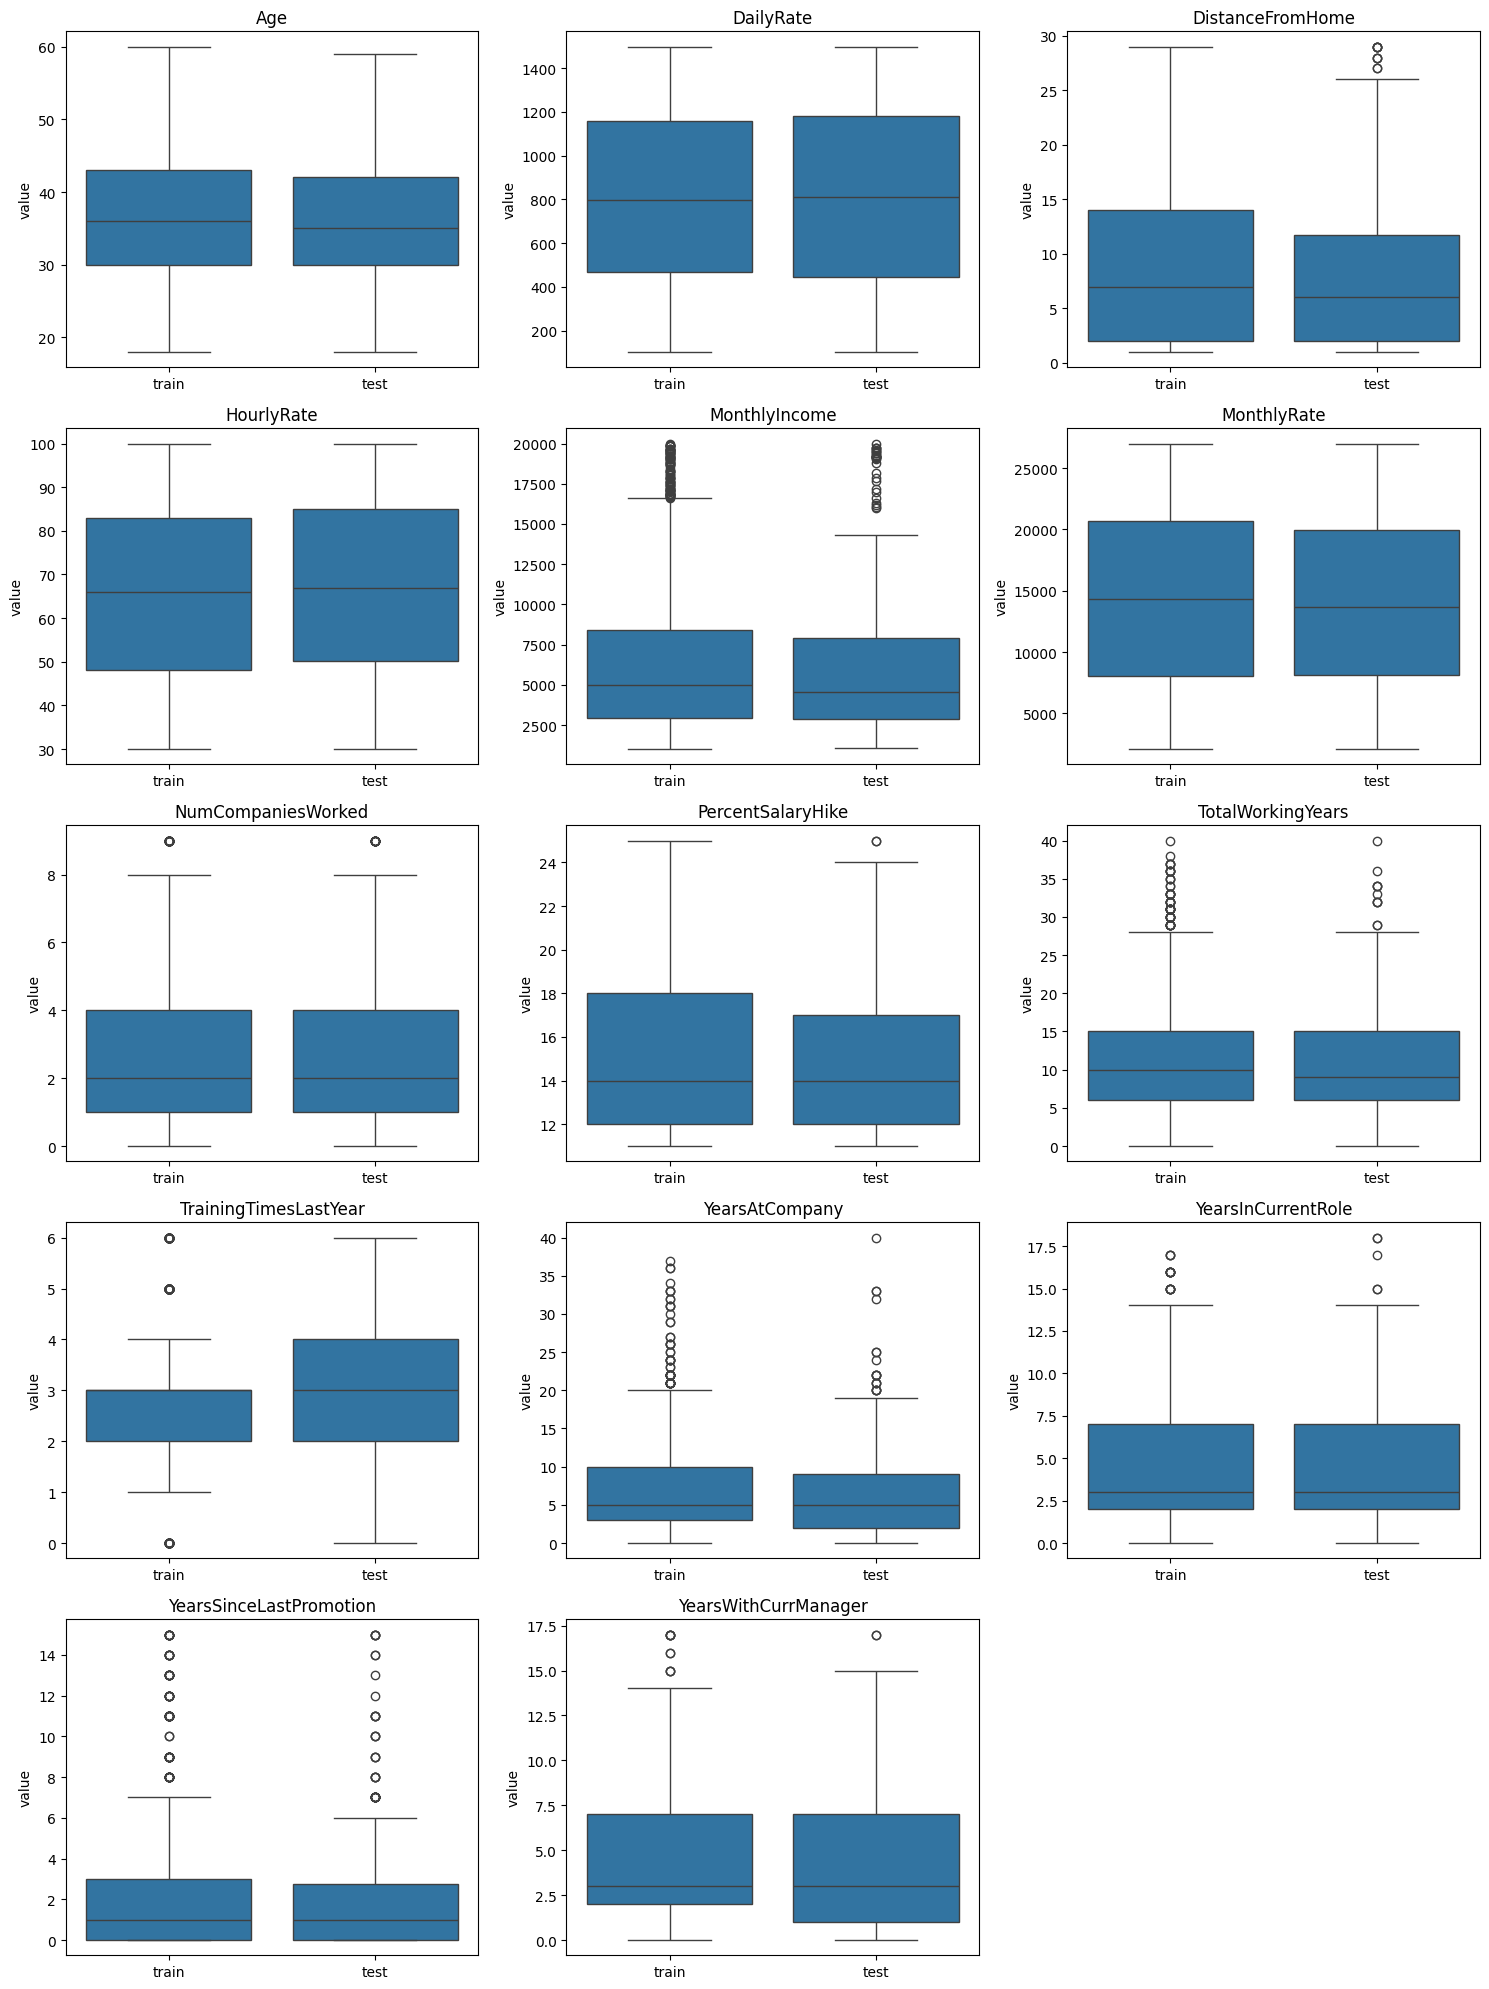

In [12]:
# Bandingkan distribusi kolom yang sama di train dan test menggunakan boxplot
common_cols = [c for c in train.columns if c in test.columns]

# Pilih hanya kolom numerik dari common_cols
numeric_common = train[common_cols].select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_common) == 0:
    print("Tidak ada kolom numerik yang sama antara train dan test untuk dibuat boxplot.")
else:
    n = len(numeric_common)
    ncols = 3
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_common):
        # Gabungkan nilai dari train dan test untuk kolom saat ini
        vals = pd.concat([train[col].rename("value"), test[col].rename("value")], ignore_index=True)
        datasets = (["train"] * train.shape[0]) + (["test"] * test.shape[0])
        plot_df = pd.DataFrame({"value": vals, "dataset": datasets})

        sns.boxplot(x="dataset", y="value", data=plot_df, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x', rotation=0)

    # Sembunyikan subplot kosong jika ada
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

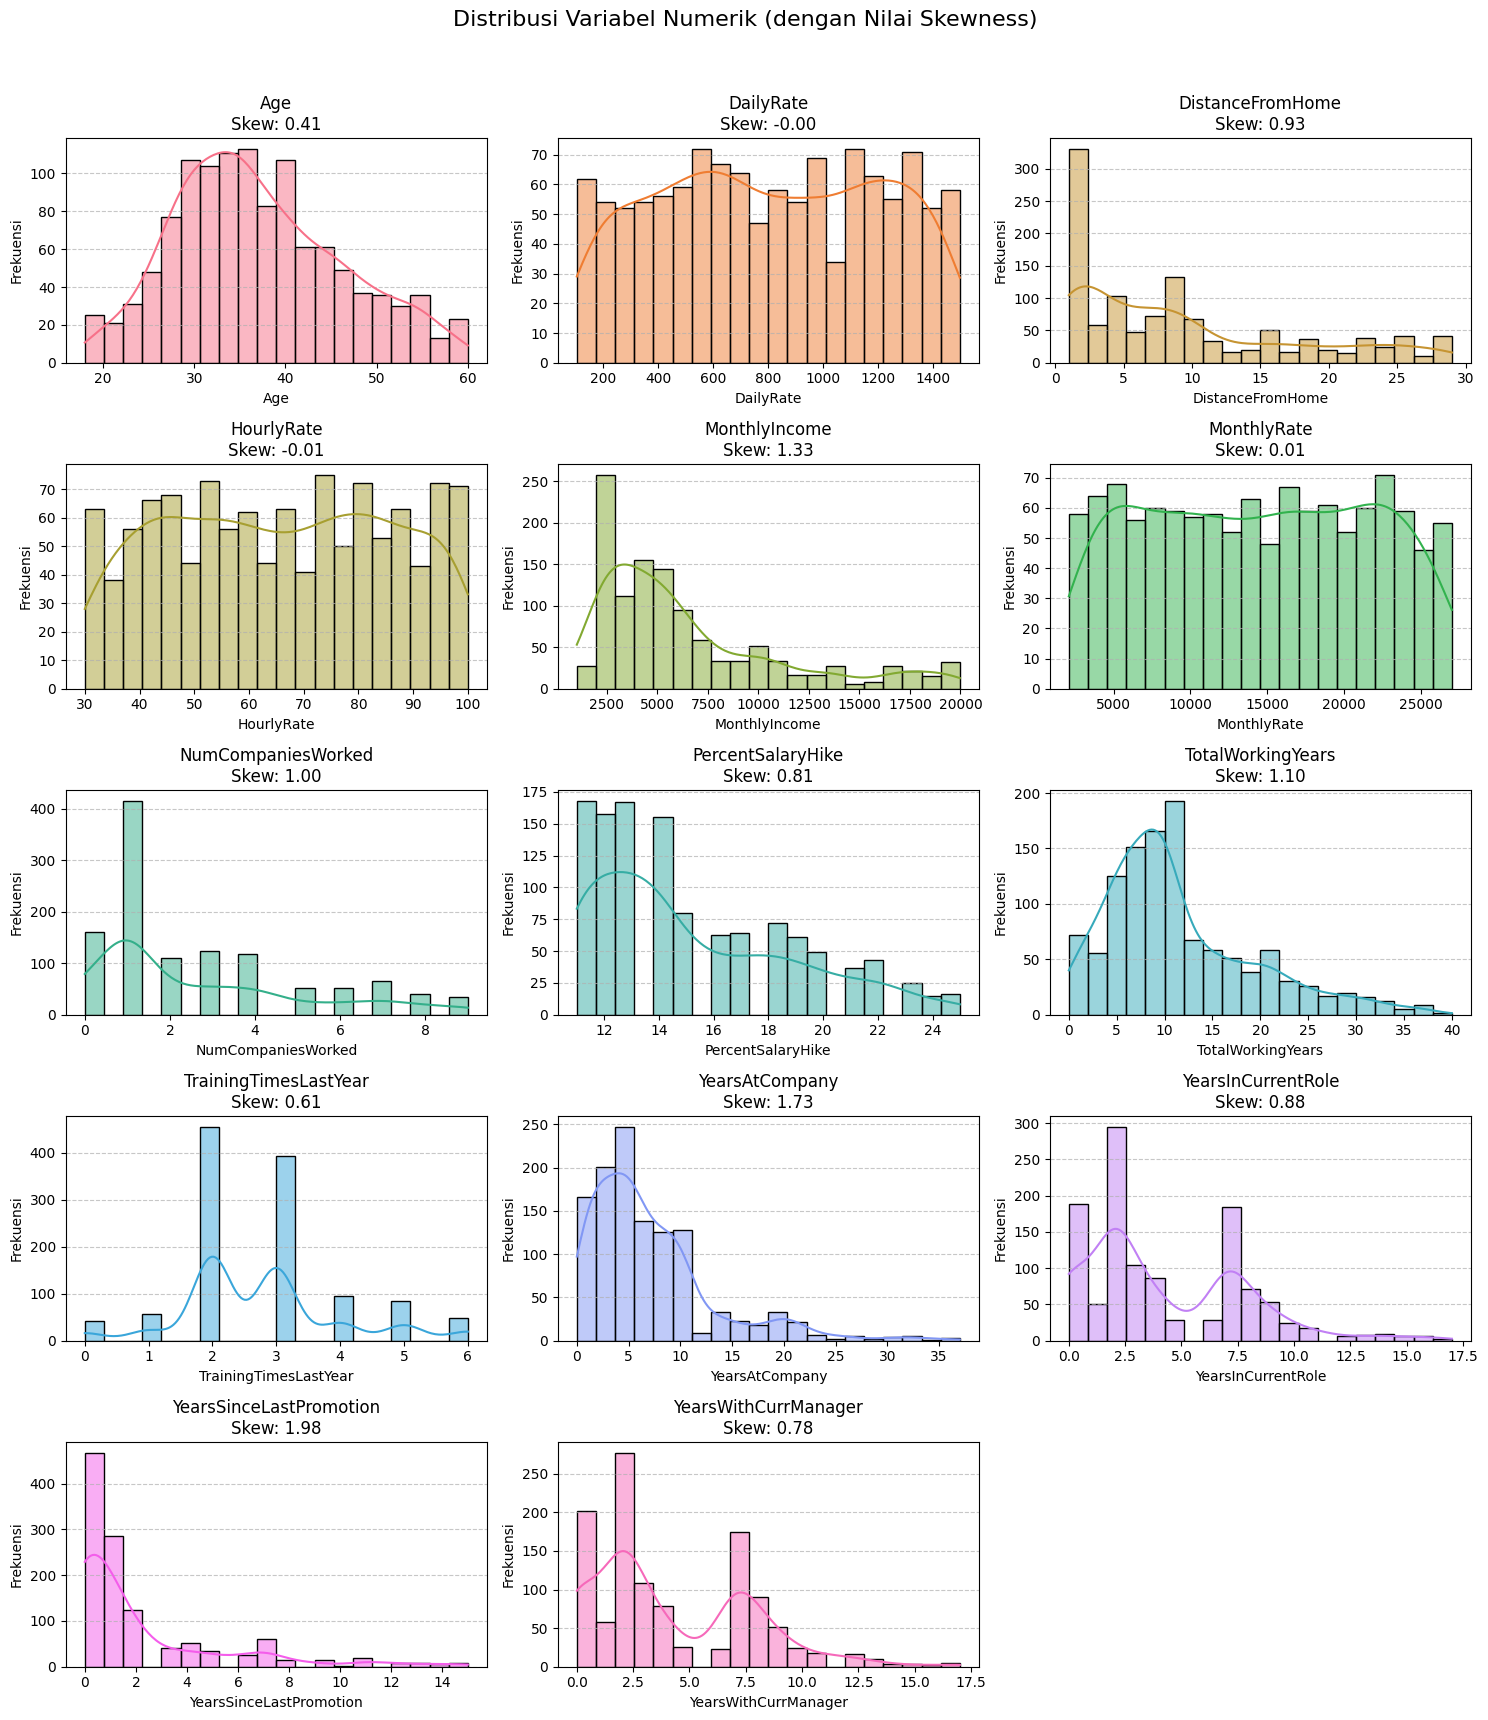

In [13]:
# Pilih kolom numerik kecuali 'Attrition'
num_cols = train.select_dtypes(include=np.number).columns.tolist()
if 'Attrition' in num_cols:
    num_cols.remove('Attrition')

if len(num_cols) == 0:
    print("Tidak ada kolom numerik untuk diplot.")
else:
    n = len(num_cols)
    ncols = 3
    nrows = (n + ncols - 1) // ncols
    colors = sns.color_palette("husl", n)

    plt.figure(figsize=(ncols * 5, nrows * 3.5))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(nrows, ncols, i)

        # Hitung nilai skewness
        skew_val = train[col].skew()

        # Plot distribusi
        sns.histplot(train[col], kde=True, bins=20, edgecolor='black', color=colors[i-1])
        plt.title(f"{col}\nSkew: {skew_val:.2f}", fontsize=12)
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Sembunyikan subplot kosong jika ada
    total_plots = nrows * ncols
    for j in range(n + 1, total_plots + 1):
        plt.subplot(nrows, ncols, j).set_visible(False)

    plt.suptitle("Distribusi Variabel Numerik (dengan Nilai Skewness)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## **4. Splitting Data**

In [14]:
X = train.drop(["Attrition"], axis=1)
y = train["Attrition"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **5. Pre-procesing**

In [15]:
from sklearn.compose import ColumnTransformer

cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

num_pipeline = Pipeline(steps=[
    ("skew_corrector", PowerTransformer(method='yeo-johnson')),
    ("scaler", MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols)
    ]
)

## **6. Training**

In [16]:
# model-model
models = {
    "SVC": SVC(probability=True, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                   random_state=42),
    "LGBMClassifier": LGBMClassifier(random_state=42, verbose=-1)
}

# scorer AUC
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

In [17]:
# Buat StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Simpan hasil ke list
results = []

# Loop nilai k (jumlah fitur yang dipilih)
for k in [45, 50, 55, 60, 62]:
    print(f"\n=== FEATURE SELECTION: k = {k} ===")

    # Loop model
    for name, model in models.items():
        print(f"\n--- Model: {name} ---")

        # Pipeline lengkap
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
            ('model', model)
        ])

        auc_scores = []

        # Cross-validation manual
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # Fit model
            pipe.fit(X_tr, y_tr)

            # Prediksi probabilitas
            if hasattr(pipe.named_steps['model'], "predict_proba"):
                y_prob = pipe.predict_proba(X_val)[:, 1]
            else:
                # fallback untuk model tanpa predict_proba
                y_prob = pipe.decision_function(X_val)
                y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())

            # Hitung AUC
            auc = roc_auc_score(y_val, y_prob)
            auc_scores.append(auc)
            print(f"Fold {fold}: AUC = {auc:.4f}")

        mean_auc = np.mean(auc_scores)
        print(f"Mean AUC ({name}, k={k}): {mean_auc:.4f}")

        # Simpan ke list hasil
        results.append({
            'Model': name,
            'K_features': k,
            'Mean_AUC': mean_auc
        })

# Konversi ke DataFrame untuk rekap hasil
results_df = pd.DataFrame(results)
print("\n=== Rekapitulasi Hasil ===")
print(results_df.sort_values(by='Mean_AUC', ascending=False))



=== FEATURE SELECTION: k = 45 ===

--- Model: SVC ---
Fold 1: AUC = 0.7781
Fold 2: AUC = 0.8893
Fold 3: AUC = 0.8673
Mean AUC (SVC, k=45): 0.8449

--- Model: RandomForest ---
Fold 1: AUC = 0.7413
Fold 2: AUC = 0.8454
Fold 3: AUC = 0.7787
Mean AUC (RandomForest, k=45): 0.7885

--- Model: LogisticRegression ---
Fold 1: AUC = 0.7967
Fold 2: AUC = 0.8897
Fold 3: AUC = 0.8706
Mean AUC (LogisticRegression, k=45): 0.8524

--- Model: XGBClassifier ---
Fold 1: AUC = 0.7680
Fold 2: AUC = 0.8973
Fold 3: AUC = 0.7850
Mean AUC (XGBClassifier, k=45): 0.8167

--- Model: LGBMClassifier ---
Fold 1: AUC = 0.7681
Fold 2: AUC = 0.8856
Fold 3: AUC = 0.7775
Mean AUC (LGBMClassifier, k=45): 0.8104

=== FEATURE SELECTION: k = 50 ===

--- Model: SVC ---
Fold 1: AUC = 0.7653
Fold 2: AUC = 0.8893
Fold 3: AUC = 0.8771
Mean AUC (SVC, k=50): 0.8439

--- Model: RandomForest ---
Fold 1: AUC = 0.7228
Fold 2: AUC = 0.8539
Fold 3: AUC = 0.7904
Mean AUC (RandomForest, k=50): 0.7890

--- Model: LogisticRegression ---
Fol

## **7. Hyperparameter Tuning**

In [18]:
param_grid = {
    'feature_selection__k': [45, 50, 55, 60, 62],       
    'model__penalty': ['l1', 'l2', 'elasticnet'],  
    'model__C': [0.01, 0.1, 1, 10, 100],           
    'model__solver': ['liblinear', 'saga']         
}

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search dengan AUC sebagai metrik utama
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\n=== Hasil Terbaik ===")
print(f"Best AUC       : {grid_search.best_score_}")
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 150 candidates, totalling 750 fits

=== Hasil Terbaik ===
Best AUC       : 0.8636257357091026
Best Parameters: {'feature_selection__k': 60, 'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


## **8. Evaluation**

In [19]:
# Ambil model terbaik dari grid search
best_model = grid_search.best_estimator_

# Prediksi probabilitas untuk AUC
y_prob = best_model.predict_proba(X_val)[:,1]

# Prediksi kelas
y_pred = best_model.predict(X_val)

# Evaluasi metrik
auc = roc_auc_score(y_val, y_prob)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("=== Logistic Regression Evaluation ===")
print(f"AUC      : {auc:.4f}")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

=== Logistic Regression Evaluation ===
AUC      : 0.9327
Accuracy : 0.9295
Precision: 0.9118
Recall   : 0.6200
F1 Score : 0.7381


## **9. Prediction**

In [20]:
test_pred = best_model.predict(test)
test_pred_prob = best_model.predict_proba(test)[:,1]
submission['Attrition'] = test_pred_prob
submission.head()
submission.to_csv('../Datasets/submission_015 124 127_Final.csv', index=False)

## **10. Model**

In [21]:
best_pipeline = grid_search.best_estimator_

with open("../model/Best Logistic Regression Pipeline.pkl", "wb") as f:
    pickle.dump(best_pipeline, f)

print("Pipeline tersimpan sebagai 'Best Logistic Regression Pipeline.pkl'")

Pipeline tersimpan sebagai 'Best Logistic Regression Pipeline.pkl'
